# Business Problem
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

# Objectives
Analyze historical movie data to:

-Understand what genres and attributes are associated with high box office performance.

-Identify trends in movie production and profitability.

-Make data-driven recommendations on the types of movies to produce.


## **Step 1**: Data Collection

-Import the necessary libraries

-Load movie data from a SQL database or CSV files.

-Explore the available tables and columns.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy import stats

### (i) Load the im.db database and inspect it

In [9]:
# Load the im.db database and read the tables using pandas
conn = sqlite3.connect(r"C:\Users\user\OneDrive\Desktop\phase_2_project\Phase-2-Project\zippedData\im.db\im.db")
cur = conn.cursor()
pd.read_sql('''SELECT name FROM sqlite_master WHERE type='table';''', conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [15]:
# Read from the movie_basics table
movie_basics_df = pd.read_sql(''' 
            SELECT *
            FROM movie_basics;
            ''',conn)
movie_basics_df.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [20]:
# Read from the movie_ratings table
movie_ratings_df = pd.read_sql('''
                               SELECT *
                               FROM movie_ratings;
                               ''',conn)
movie_ratings_df.head()


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [19]:
# Read from the movie_akas table
movie_akas_df = pd.read_sql(''' SELECT *
                            FROM movie_akas;
                            ''', conn)
movie_akas_df.head()


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [18]:
directors_df = pd.read_sql(''' 
                           SELECT *
                           FROM directors;
                           ''',conn)
directors_df


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [17]:
persons_df = pd.read_sql(''' 
                        SELECT *
                        FROM persons;
                        ''', conn)
persons_df


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [16]:
principals_df = pd.read_sql(''' 
                        SELECT *
                        FROM principals;
                        ''', conn)
principals_df


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [21]:
# Join the tables picking only the relevant columns

joined_imdb_df = pd.read_sql('''
                            SELECT 
                            mb.movie_id, mb.start_year, mb.genres,mb.original_title,
                            mr.averagerating,
                            ma.ordering,ma.region,
                            dr.person_id,
                            pe.primary_name
                            FROM movie_basics AS mb
                            INNER JOIN movie_ratings AS mr
                            ON mb.movie_id = mr.movie_id
                            INNER JOIN movie_akas AS ma
                            ON mb.movie_id = ma.movie_id
                            INNER JOIN directors AS dr
                            on mr.movie_id = dr.movie_id
                            INNER JOIN persons AS pe 
                            ON dr.person_id = pe.person_id
                            ''',conn
                            )

joined_imdb_df


,movie_id,start_year,genres,original_title,averagerating,ordering,region,person_id,primary_name
0,tt0063540,2013,"Action,Crime,Drama",Sunghursh,7.0,1,IN,nm0712540,Harnam Singh Rawail
1,tt0063540,2013,"Action,Crime,Drama",Sunghursh,7.0,1,IN,nm0712540,Harnam Singh Rawail
2,tt0063540,2013,"Action,Crime,Drama",Sunghursh,7.0,1,IN,nm0712540,Harnam Singh Rawail
3,tt0063540,2013,"Action,Crime,Drama",Sunghursh,7.0,1,IN,nm0712540,Harnam Singh Rawail
4,tt0063540,2013,"Action,Crime,Drama",Sunghursh,7.0,2,None,nm0712540,Harnam Singh Rawail
...,...,...,...,...,...,...,...,...,...
722933,tt9911774,2019,Drama,Padmavyuhathile Abhimanyu,8.4,2,IN,nm10536451,Vineesh Aaradya
722934,tt9911774,2019,Drama,Padmavyuhathile Abhimanyu,8.4,2,IN,nm10536451,Vineesh Aaradya
722935,tt9911774,2019,Drama,Padmavyuhathile Abhimanyu,8.4,3,IN,nm10536451,Vineesh Aaradya
722936,tt9911774,2019,Drama,Padmavyuhathile Abhimanyu,8.4,3,IN,nm10536451,Vineesh Aaradya


In [14]:
joined_imdb_df['region'].value_counts()

region
US      90861
XWW     37239
RU      36735
DE      26725
GB      23141
        ...  
CSHH        1
CV          1
LY          1
BJ          1
SB          1
Name: count, Length: 195, dtype: int64

In [123]:
# check the information about the dataframe
joined_imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722938 entries, 0 to 722937
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   movie_id       722938 non-null  object 
 1   start_year     722938 non-null  int64  
 2   genres         720595 non-null  object 
 3   averagerating  722938 non-null  float64
 4   ordering       722938 non-null  int64  
 5   region         612649 non-null  object 
 6   person_id      722938 non-null  object 
 7   primary_name   722938 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 44.1+ MB


In [124]:
# Inspect the shape of the dataframe
rows,columns = joined_imdb_df.shape
print(f' The dataframe has {rows} rows and {columns} columns')

 The dataframe has 722938 rows and 8 columns


In [132]:
# check for duplicates
duplicates = joined_imdb_df.duplicated()
duplicate_count = duplicates.sum()
if duplicate_count > 0:
    print(f"Number of duplicated rows: {duplicate_count}")
else:
    print("No duplicated rows found.")

No duplicated rows found.


In [126]:
# Drop duplicates and recheck the shape
joined_imdb_df.drop_duplicates(inplace=True)
rows, columns = joined_imdb_df.shape
print(f'The non-duplicate dataframe has {rows} rows and {columns} columns')

The non-duplicate dataframe has 301341 rows and 8 columns


In [127]:
# check for missing values
joined_imdb_df.isna().sum()

movie_id             0
start_year           0
genres            1410
averagerating        0
ordering             0
region           50359
person_id            0
primary_name         0
dtype: int64

In [128]:
# check for percentage of each missing column so as to determine the methods of cleaning
missing_percent_per_column = joined_imdb_df.isnull().mean() * 100
missing_percent_per_column

movie_id          0.000000
start_year        0.000000
genres            0.467908
averagerating     0.000000
ordering          0.000000
region           16.711632
person_id         0.000000
primary_name      0.000000
dtype: float64

Two columns (genres, region) require cleaning;

- we replace the null values of genre and region with the mode


In [129]:
# create a copy of the original dataframe
merged_sql_df_copy = joined_imdb_df.copy()

In [130]:
# Replace missing values in the region column with mode
column_to_fill = ['genres', 'region']
merged_sql_df_copy[column_to_fill] = merged_sql_df_copy[column_to_fill].fillna(merged_sql_df_copy[column_to_fill].mode().iloc[0])


In [131]:
# Recheck if the dataframe is fully clean
merged_sql_df_copy.isna().sum()

movie_id         0
start_year       0
genres           0
averagerating    0
ordering         0
region           0
person_id        0
primary_name     0
dtype: int64

### (ii) Load the rotten tomatoes dataset using pandas,inspect it and clean it

In [265]:


rotten_tomatoes_df = pd.read_csv(
    r"C:\Users\user\Desktop\phase_2_project\Phase-2-Project\zippedData\rt.movie_info.tsv\rt.movie_info.tsv",
    sep='\t',
    encoding='utf-8'
)

rotten_tomatoes_df.head()



,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [266]:
# check for information about the dataframe
rotten_tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [267]:
# Inspect the shape of the dataframe
rows, columns = rotten_tomatoes_df.shape
print(f'Number of columns:{columns}')
print(f'Number or rows: {rows}')

Number of columns:12
Number or rows: 1560


In [268]:
# check for duplicates
duplicates = rotten_tomatoes_df.duplicated()
duplicate_count = duplicates.sum()
if duplicate_count == 0:
    print('No duplicated values')
else:
    print(f'Duplicated values count: {duplicate_count}')

No duplicated values


In [269]:
# check for mising values
rotten_tomatoes_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [270]:
# check for percentage of each missing column so as to determine the methods of cleaning
missing_percent_per_column2 = rotten_tomatoes_df.isnull().mean() * 100
missing_percent_per_column2



id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64

-Multiple columns require cleaning

-We first create a copy of the dataframe before perfoming cleaning

In [271]:
# create a copy of the original dataframe
rotten_tomatoes_df_copy = rotten_tomatoes_df.copy()

### Data Cleaning

In [272]:
# For columns having missing values more than 50% we drop them 
rotten_dropped = rotten_tomatoes_df_copy.drop(columns=['currency','box_office','studio'],inplace=True)

In [273]:
# For columns having missing values between 10%-49% we drop the rows with missing values
rotten_tomatoes_df_copy.dropna(subset = ['director', 'writer', 'theater_date','dvd_date'], inplace=True)

In [274]:
# For columns with less than 10% of missing values, replace the missing values with mode
columns_to_fill = ['synopsis', 'rating', 'genre', 'runtime']
rotten_tomatoes_df_copy[columns_to_fill] = rotten_tomatoes_df_copy[columns_to_fill].fillna(rotten_tomatoes_df_copy[columns_to_fill].mode().iloc[0])

In [275]:
# check if the dataframe is fully clean
rotten_tomatoes_df_copy.isna().sum()


id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
dtype: int64

The dataframe is now clean and ready for analysis

### (iii) Load the Rotten Tomatoes Reviews Dataset, inspect it and clean it

In [276]:
rt_reviews_df = pd.read_csv(
    r"C:\Users\user\Desktop\phase_2_project\Phase-2-Project\zippedData\rt.reviews.tsv\rt.reviews.tsv",
    sep='\t',  
    encoding='latin1' 
)

rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [277]:
# check for the dataframe's info
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [278]:
# Inspect the shape of the dataframe
rows, columns = rt_reviews_df.shape
print(f'Number of columns:{columns}')
print(f'Number or rows: {rows}')

Number of columns:8
Number or rows: 54432


In [279]:
# check for duplicates
duplicates = rt_reviews_df.duplicated()
duplicate_count = duplicates.sum()
if duplicate_count == 0:
    print('No duplicated values')
else:
    print(f'Duplicated values count: {duplicate_count}')

Duplicated values count: 9


In [281]:
# check for mising values
rt_reviews_df.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [282]:
# check for percentage of each missing column so as to determine the methods of cleaning
missing_percent_per_column3 = rt_reviews_df.isnull().mean() * 100
missing_percent_per_column3

id             0.000000
review        10.220091
rating        24.832819
fresh          0.000000
critic         5.000735
top_critic     0.000000
publisher      0.567681
date           0.000000
dtype: float64

-Multiple columns require cleaning

-We first create a copy of the dataframe before perfoming cleaning

In [283]:
rt_reviews_df_copy = rt_reviews_df.copy()

In [284]:
# drop rows with more than 20% of missing data
rt_reviews_df_copy.dropna(subset = ['rating'], inplace=True)


In [285]:
# replace columns having missing values between 0.1-20% with the mode
columns_replaced = ['review', 'critic', 'publisher']
rt_reviews_df_copy[columns_replaced] = rt_reviews_df_copy[columns_replaced].fillna(rt_reviews_df_copy[columns_replaced].mode().iloc[0])

In [286]:
# check if the dataframe is fully clean
rt_reviews_df_copy.isna().sum()


id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

The dataframe is now clean and ready for the next steps

Join the rotten_tomatoes_df Dataframe and rt_reviews_df Dataframe using inner join

In [321]:

rotten_reviews_df = (
    rotten_tomatoes_df_copy.set_index('id')
    .join(
        rt_reviews_df_copy.set_index('id'),
        how='inner',
        lsuffix='_movie',
        rsuffix='_review'
    )
    .reset_index()
)
rotten_reviews_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,review,review_rating,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [300]:
# check the Dataframe info
rotten_reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42887 entries, 0 to 42886
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             42887 non-null  int64 
 1   synopsis       42887 non-null  object
 2   rating         42887 non-null  object
 3   genre          42887 non-null  object
 4   director       42887 non-null  object
 5   writer         42887 non-null  object
 6   theater_date   42887 non-null  object
 7   dvd_date       42887 non-null  object
 8   runtime        42887 non-null  object
 9   review         38652 non-null  object
 10  review_rating  32163 non-null  object
 11  fresh          42887 non-null  object
 12  critic         40771 non-null  object
 13  top_critic     42887 non-null  int64 
 14  publisher      42629 non-null  object
 15  date           42887 non-null  object
dtypes: int64(2), object(14)
memory usage: 5.2+ MB


In [301]:
# check for duplicates
duplicates = rotten_reviews_df.duplicated()
duplicate_count = duplicates.sum()
if duplicate_count == 0:
    print('No duplicated values')
else:
    print(f'Duplicated values count: {duplicate_count}')

Duplicated values count: 8


In [302]:
# Drop duplicates
null_duplicates = rotten_reviews_df.drop_duplicates()

In [303]:
# Check for missing values

rotten_reviews_df.isna().sum()

id                   0
synopsis             0
rating               0
genre                0
director             0
writer               0
theater_date         0
dvd_date             0
runtime              0
review            4235
review_rating    10724
fresh                0
critic            2116
top_critic           0
publisher          258
date                 0
dtype: int64

In [304]:
# check for percentage of each missing column so as to determine the methods of cleaning
missing_percent_per_column5 = rotten_reviews_df.isnull().mean() * 100
missing_percent_per_column5


id                0.000000
synopsis          0.000000
rating            0.000000
genre             0.000000
director          0.000000
writer            0.000000
theater_date      0.000000
dvd_date          0.000000
runtime           0.000000
review            9.874787
review_rating    25.005246
fresh             0.000000
critic            4.933896
top_critic        0.000000
publisher         0.601581
date              0.000000
dtype: float64

In [305]:
# create a copy of the dataframe

rotten_reviews_df_copy = rotten_reviews_df.copy()

In [307]:
# Replace review,critic,publisher with the mode
moded_columns = ['review', 'critic','publisher']
rotten_reviews_df_copy[moded_columns] = rotten_reviews_df_copy[moded_columns].fillna(rotten_reviews_df_copy[moded_columns].mode().iloc[0])

In [ ]:
# Drop the rows of the review rating
rotten_reviews_df_copy.dropna(subset=['review_rating'], inplace=True)

In [310]:
# Recheck if the dataframe is fully clean
rotten_reviews_df_copy.isna().sum()

id               0
synopsis         0
rating           0
genre            0
director         0
writer           0
theater_date     0
dvd_date         0
runtime          0
review           0
review_rating    0
fresh            0
critic           0
top_critic       0
publisher        0
date             0
dtype: int64

The Dataframe is fully cleaned and ready for analysis

# Data Visualization

Bar Graph of the top 20 directors by number of movies directed

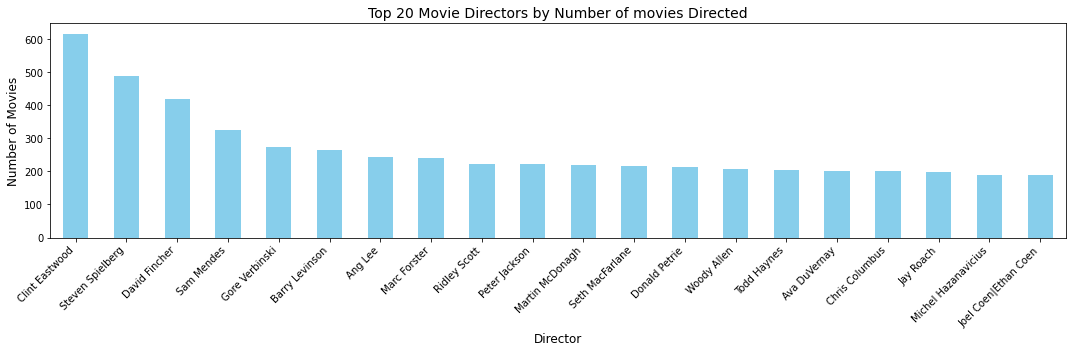

In [320]:

# 1. Count movies per director
director_counts = rotten_reviews_df_copy['director'].value_counts()

# 2. Create the plot
plt.figure(figsize=(15,5))

# Plot top 20 directors
director_counts.head(20).plot(kind='bar', color='skyblue')

# 3. Add labels and title
plt.title('Top 20 Movie Directors by Number of movies Directed', fontsize=14)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right') 

# 4. Show the plot
plt.tight_layout() 
plt.show()

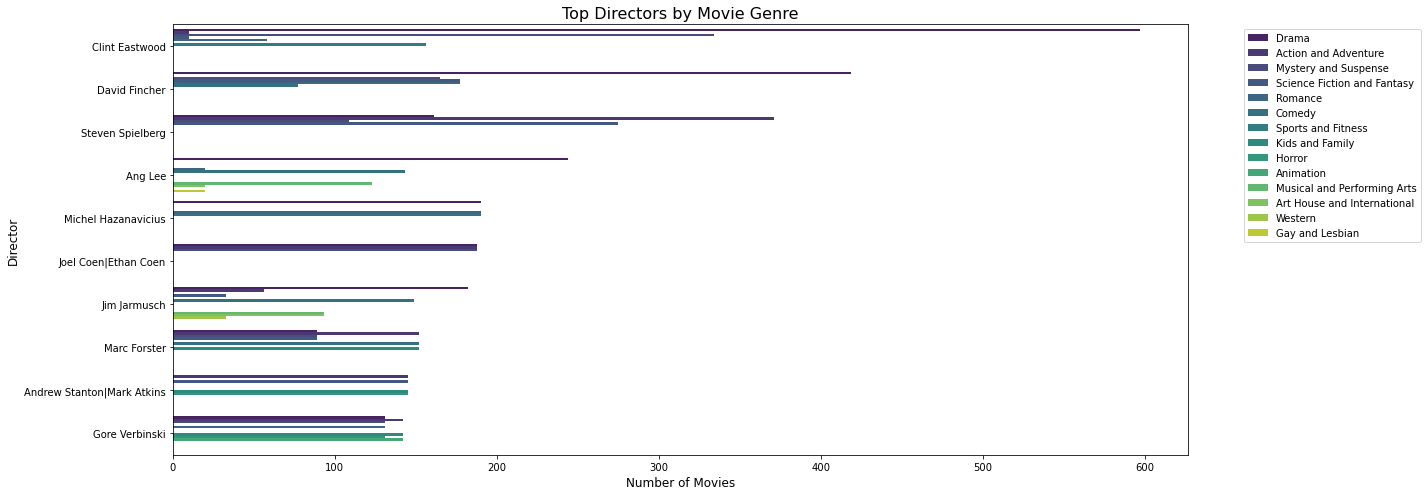

In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data preparation (in case you need to test)
# data = {'directors': ['Director A', 'Director B', 'Director A'],
#         'genres': ['Comedy|Drama', 'Action|Thriller', 'Comedy|Romance']}
# df = pd.DataFrame(data)

# 1. Split and explode genres
df_expanded = rotten_reviews_df_copy.assign(genre=rotten_reviews_df_copy['genre'].str.split('|')).explode('genre')

# 2. Clean genre strings (remove whitespace)
df_expanded['genres'] = df_expanded['genre'].str.strip()

# 3. Count director-genre combinations
director_genre_counts = df_expanded.groupby(['director', 'genre']).size().reset_index(name='count')

# 4. Get top N directors by total movies
top_directors = df_expanded['director'].value_counts().head(10).index

# 5. Filter and sort data
plot_data = director_genre_counts[director_genre_counts['director'].isin(top_directors)]
plot_data = plot_data.sort_values('count', ascending=False)

# 6. Create the plot
plt.figure(figsize=(20,7))
sns.barplot(data=plot_data, 
            x='count', 
            y='director', 
            hue='genre',
            palette='viridis',
            dodge=True)

plt.title('Top Directors by Movie Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### (iii) Load the tmdb.movies_csv dataset

In [188]:

tmdb_df = pd.read_csv(r"C:\Users\user\Desktop\phase_2_project\Phase-2-Project\zippedData\tmdb.movies.csv\tmdb.movies.csv")
tmdb_df


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [3]:
tn = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\phase_2_project\Phase-2-Project\zippedData\tn.movie_budgets.csv\tn.movie_budgets.csv")
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### (iv) Load the bom.movie_gross.csv dataset

In [189]:
gross_df = pd.read_csv(r"C:\Users\user\Desktop\phase_2_project\Phase-2-Project\zippedData\bom.movie_gross.csv\bom.movie_gross.csv")
gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Join the two datasets above

In [190]:
tmdb_df['original_title'] = tmdb_df['title']
tmdb_df.drop(columns=['original_title'], inplace=True)

tmdb_df = tmdb_df.set_index('title')
gross_df = gross_df.set_index('title')

imdb_gross_df = tmdb_df.join(gross_df, how='inner')

imdb_gross_df.head()

,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
title,,,,,,,,,,,,
'71,14303,"[53, 28, 18, 10752]",252178,en,10.523,2015-02-27,6.8,627,RAtt.,1300000.0,355000,2015
10 Cloverfield Lane,17422,"[53, 878, 18]",333371,en,17.892,2016-03-11,6.9,4629,Par.,72100000.0,38100000,2016
10 Years,5504,"[35, 18]",58547,en,6.724,2012-09-14,5.8,299,Anch.,203000.0,NaN,2012
11-11-11,2978,"[27, 53]",51248,en,5.196,2011-11-11,4.3,116,Rocket,32800.0,5700000,2011
12 Strong,24032,"[10752, 18, 36, 28]",429351,en,13.183,2018-01-19,5.6,1312,WB,45800000.0,21600000,2018


In [ ]:
# Check the info of the joined(imdb_gross_df) dataset
imdb_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2703 entries, '71 to mother!
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2703 non-null   int64  
 1   genre_ids          2703 non-null   object 
 2   id                 2703 non-null   int64  
 3   original_language  2703 non-null   object 
 4   popularity         2703 non-null   float64
 5   release_date       2703 non-null   object 
 6   vote_average       2703 non-null   float64
 7   vote_count         2703 non-null   int64  
 8   studio             2702 non-null   object 
 9   domestic_gross     2682 non-null   float64
 10  foreign_gross      1723 non-null   object 
 11  year               2703 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 274.5+ KB


In [ ]:
# Check for duplicates

duplicates = imdb_gross_df.duplicated()
duplicate_count = duplicates.sum()
if duplicate_count == 0:
    print('No duplicated values')
else:
    print(f'Duplicated values count: {duplicate_count}')


No duplicated values


In [ ]:
# Check for missing values
imdb_gross_df.isna().sum()

Unnamed: 0             0
genre_ids              0
id                     0
original_language      0
popularity             0
release_date           0
vote_average           0
vote_count             0
studio                 1
domestic_gross        21
foreign_gross        980
year                   0
dtype: int64

In [195]:
# check for percentage of each missing column so as to determine the methods of cleaning
missing_percent_per_column4 =imdb_gross_df.isnull().mean() * 100
missing_percent_per_column4

Unnamed: 0            0.000000
genre_ids             0.000000
id                    0.000000
original_language     0.000000
popularity            0.000000
release_date          0.000000
vote_average          0.000000
vote_count            0.000000
studio                0.036996
domestic_gross        0.776915
foreign_gross        36.256012
year                  0.000000
dtype: float64

The dataframe has missing values in three columns(studio, domestic_gross and foreign_gross)

In [194]:
# make a copy of the dataframe
imdb_gross_df_copy = imdb_gross_df.copy()

In [199]:
# Drop the rows of missing values in the foreign column
imdb_gross_df_copy.dropna(subset=['foreign_gross'],inplace=True)

In [200]:
# Replace studio and domestic count with their modes
columns_moded = ['studio', 'domestic_gross']
imdb_gross_df_copy[columns_moded] = imdb_gross_df_copy[columns_moded].fillna(imdb_gross_df_copy[columns_moded].mode().iloc[0])

In [201]:
# Recheck if the Dataframe is fully clean
imdb_gross_df_copy.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
popularity           0
release_date         0
vote_average         0
vote_count           0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
dtype: int64

The Dataframe is fully clean and ready for analysis

# Data Visualization

1. Heatmap showing correlation between original_language, popularity and total_gross

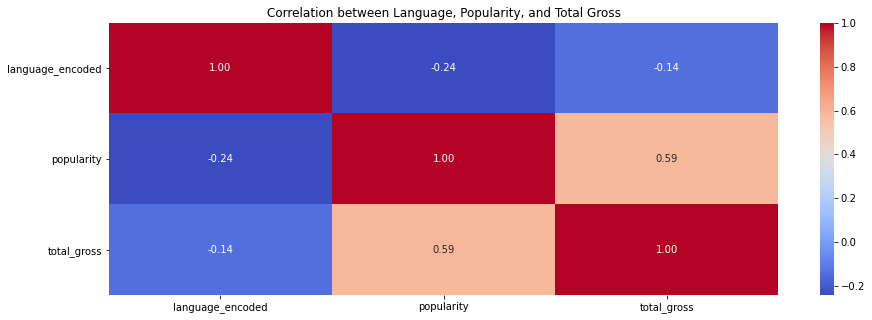

In [ ]:
# First,convert the foreign_gross to a float

imdb_gross_df_copy['foreign_gross'] = imdb_gross_df_copy['foreign_gross'].astype(str)

imdb_gross_df_copy['foreign_gross'] = imdb_gross_df_copy['foreign_gross'].str.replace(',', '')

imdb_gross_df_copy['foreign_gross'] = imdb_gross_df_copy['foreign_gross'].replace('', '0').astype(float)


# Create a total_gross column
imdb_gross_df_copy['total_gross'] = imdb_gross_df_copy['domestic_gross'] + imdb_gross_df_copy['foreign_gross']

# Encode the languages so as to compute correlation
imdb_gross_df_copy['language_encoded'] = imdb_gross_df_copy['original_language'].factorize()[0]

# Compute correlation
corr_df = imdb_gross_df_copy[['language_encoded', 'popularity', 'total_gross']]
corr_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Language, Popularity, and Total Gross')
plt.show()


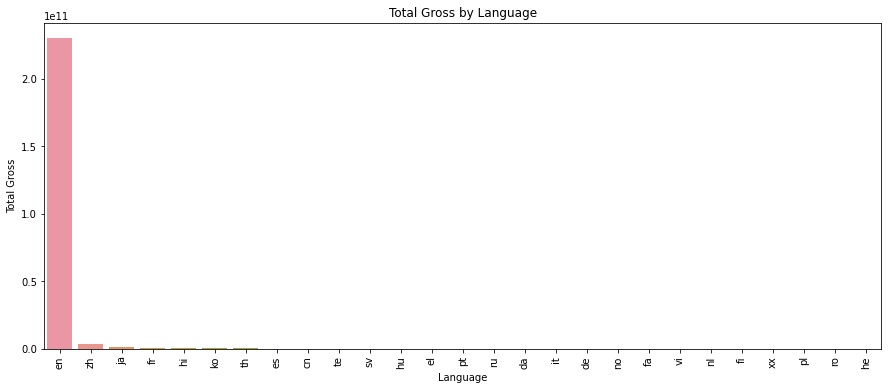

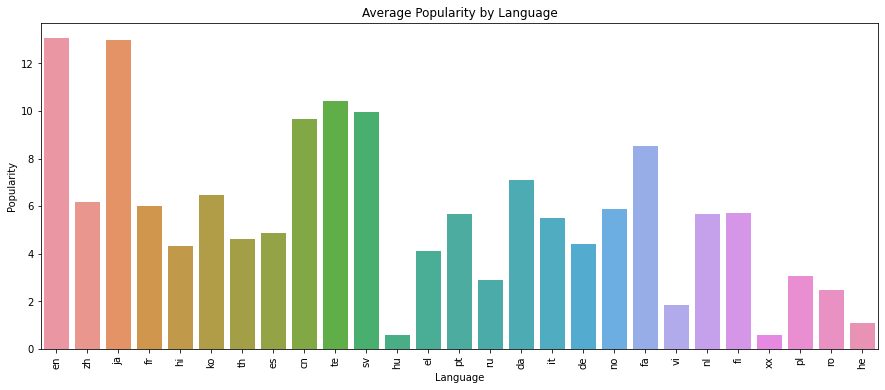

In [ ]:
# Group by original language
language_summary = imdb_gross_df_copy.groupby('original_language').agg({
    'popularity': 'mean',       # Average popularity
    'total_gross': 'sum'         # Total gross revenue
}).sort_values(by='total_gross', ascending=False)  # Sort by total_gross

# Display the summary
#print(language_summary)


plt.figure(figsize=(15,6))
sns.barplot(x=language_summary.index, y=language_summary['total_gross'])
plt.xticks(rotation=90)
plt.title('Total Gross by Language')
plt.xlabel('Language')
plt.ylabel('Total Gross')
plt.show()

plt.figure(figsize=(15,6))
sns.barplot(x=language_summary.index, y=language_summary['popularity'])
plt.xticks(rotation=90)
plt.title('Average Popularity by Language')
plt.xlabel('Language')
plt.ylabel('Popularity')
plt.show()


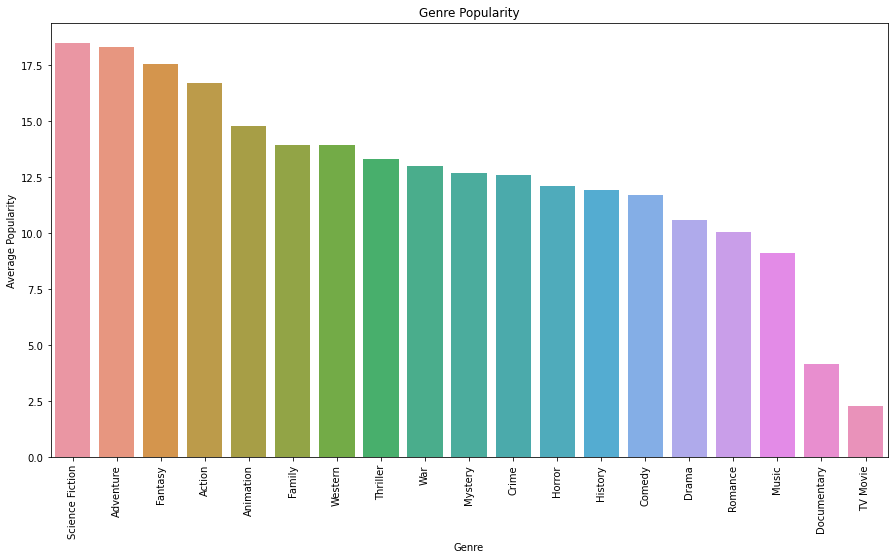

In [235]:
import ast
# Genre ID to Name Mapping (based on TMDB genres)
genre_mapping = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

# Fix genre_ids if needed
imdb_gross_df_copy['genre_ids'] = imdb_gross_df_copy['genre_ids'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Explode, map genre names, drop missing
df = imdb_gross_df_copy.explode('genre_ids')
df['genre_name'] = df['genre_ids'].map(genre_mapping)
df = df.dropna(subset=['genre_name'])

# Group and plot
plt.figure(figsize=(15,8))
sns.barplot(
    data=df.groupby('genre_name', as_index=False)['popularity'].mean().sort_values('popularity', ascending=False),
    x='genre_name', y='popularity'
)
plt.xticks(rotation=90)
plt.title('Genre Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.show()
